In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import datetime as dt
from math import floor

In [2]:
tickers = ["ARZZ3.SA", "VALE3.SA", "PETR3.SA", "ITUB3.SA"]
start = dt.datetime(2010, 1, 1)
end = dt.datetime(2019, 12, 30)

In [3]:
#Aqui esta declarado o data frame
acoes = pd.DataFrame()
for t in tickers:
    acoes[t] = wb.DataReader(t, "yahoo", start, end)["Adj Close"]
acoes = acoes.round(2)

In [4]:
#Construcao da coluna de datas
dates =[]
for x in range(len(acoes)):
    newdate = str(acoes.index[x])
    newdate = newdate[0:10]
    dates.append(newdate)
acoes['DATA'] = dates


#Este comando movera a coluna de data para a primeira coluna, facilitando a analise
colunas = acoes.columns.tolist()
colunas = colunas[-1:] + colunas[:-1]
colunas
acoes = acoes[colunas]



#Separa uma coluna para mes + ano
acoes['DATA'] = acoes['DATA'].astype('datetime64[ns]')
acoes["Month_Day"] = pd.DatetimeIndex(acoes['DATA']).month
acoes["Month_Day"] = acoes["Month_Day"].astype(str)
acoes["Year"] = pd.DatetimeIndex(acoes['DATA']).year
acoes["Year"] = acoes["Year"].astype(str)
acoes["MesEAno"] = acoes["Month_Day"] + "-" + acoes["Year"]
acoes = acoes.drop(columns=['Year', 'Month_Day'])

#Dataframe contendo somente as datas
as_datas = pd.DataFrame(acoes["DATA"])


acoes.drop(columns =["DATA"], inplace = True)
acoes

,ARZZ3.SA,VALE3.SA,PETR3.SA,ITUB3.SA,MesEAno
Date,,,,,
2011-02-02,17.07,39.50,27.30,8.64,2-2011
2011-02-03,16.91,39.43,27.65,8.59,2-2011
2011-02-04,16.87,38.77,27.30,8.37,2-2011
2011-02-07,16.87,39.06,26.87,8.43,2-2011
2011-02-08,16.13,38.83,26.45,8.65,2-2011
...,...,...,...,...,...
2019-12-20,64.74,53.38,30.75,30.68,12-2019
2019-12-23,65.80,53.17,31.20,31.08,12-2019
2019-12-26,64.77,53.38,31.48,31.55,12-2019


In [5]:
#Aqui poderemos simular com todos os PRIMEIROS precos do DataFrame
primeiros_precos = acoes.drop_duplicates(subset =["MesEAno"], keep = "first")
primeiros_precos = primeiros_precos.drop(columns=["MesEAno"])

#Retorna primeiro preco do mes para calculo futuro
preco_mensal = acoes.drop_duplicates(subset =["MesEAno"], keep = "first")


#Declara o valor investido em cada ativo
investimento = 1000

#Declaracao do numero de acoes comprados EM CADA MES (eh preciso deixar no floor se for simular um numero exato,
# e sem se a carteira for puramente teorica) 
primeiros_precos = investimento / primeiros_precos
primeiros_precos

#Retorna uma serie com a soma do numero de acoes no periodo
numero_de_acoes = primeiros_precos.sum(axis = 0)
numero_de_acoes = numero_de_acoes.values.tolist()

primeiros_precos

,ARZZ3.SA,VALE3.SA,PETR3.SA,ITUB3.SA
Date,,,,
2011-02-02,58.582308,25.316456,36.630037,115.740741
2011-03-01,59.276823,26.301946,35.310734,112.107623
2011-04-04,55.340343,26.831232,34.614053,103.519669
2011-05-02,50.352467,28.034763,39.401103,106.269926
2011-06-01,50.000000,28.851702,42.176297,111.982083
...,...,...,...,...
2019-08-01,19.290123,21.208908,37.119525,34.867503
2019-09-02,20.802996,22.311468,37.355248,34.989503
2019-10-01,20.181635,21.514630,34.855350,34.614053


In [6]:
#Valores finais eh a lista contendo o preco ajustado final de cada acao da lista. Feita conversao
#Para que a lista tenha 1 dimensao. O ideal eh sempre te-la no dia apos a analise
final = pd.DataFrame()
for t in tickers:
    final[t] = wb.DataReader(t, "yahoo", "2020-01-02", "2020-01-02")["Adj Close"]
final = final.round(2)
valores_finais = final.values.tolist()
valores_finais = valores_finais[0]
valores_finais

[63.91, 54.33, 31.58, 31.87]

In [7]:
acoes_acumuladas = primeiros_precos.cumsum()

for t in tickers:
    acoes_acumuladas[t] = acoes_acumuladas[t].mul(list(preco_mensal[t]), axis=0)
acoes_acumuladas
#acoes_acumuladas["PATRIMONIO"] = acoes_acumuladas.sum(axis=1)
#acoes_acumulada"


,ARZZ3.SA,VALE3.SA,PETR3.SA,ITUB3.SA
Date,,,,
2011-02-02,1000.000000,1000.000000,1000.000000,1000.000000
2011-03-01,1988.283538,1962.531646,2037.362637,2032.407407
2011-04-04,3129.714495,2923.817844,3078.368877,3201.015197
2011-05-02,4439.741554,3798.298430,3704.361443,4118.173189
2011-06-01,5471.038826,4690.749190,4460.615044,4908.106969
...,...,...,...,...
2019-08-01,205322.816419,195454.902347,183072.758766,234050.836154
2019-09-02,191390.968080,186796.155316,182917.511217,234234.759320
2019-10-01,198283.596179,194714.531439,197036.735032,237775.444253


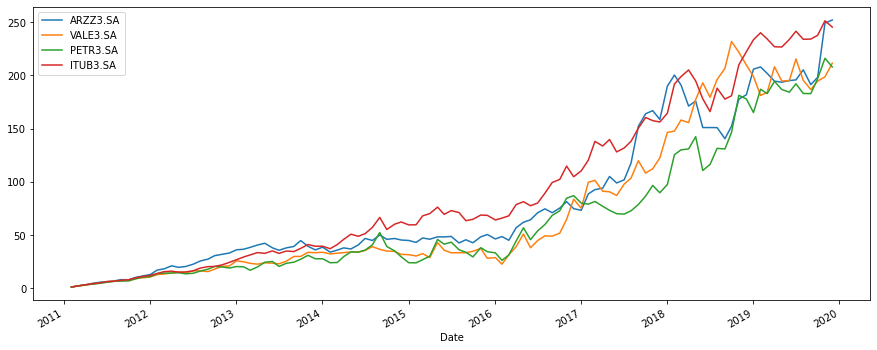

In [8]:
(acoes_acumuladas / acoes_acumuladas.iloc[0]).plot(figsize=(15,6))
plt.show()